# Apartments Price Analysis

---

Author Name: Jiaxu Li

Email: u25jl21@abdn.ac.uk

ID: 50079685

Finish time: 28/5/2024 

---

Additional information about the dataset: https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified

# Data loading

In [ ]:
# Add any pre-requisites or libraries here
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
# Import the data
df = pd.read_csv("apartments.csv", low_memory=False)



Have a brief look at the data， and find out there are 99492 rows and 22 columns in this dataset.


In [ ]:
df.shape

(99492, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99492 non-null  int64  
 1   category       99492 non-null  object 
 2   title          99492 non-null  object 
 3   body           99492 non-null  object 
 4   amenities      83448 non-null  object 
 5   bathrooms      99429 non-null  float64
 6   bedrooms       99368 non-null  float64
 7   currency       99492 non-null  object 
 8   fee            99492 non-null  object 
 9   has_photo      99492 non-null  object 
 10  pets_allowed   39068 non-null  object 
 11  price          99491 non-null  float64
 12  price_display  99491 non-null  object 
 13  price_type     99492 non-null  object 
 14  square_feet    99492 non-null  int64  
 15  address        7943 non-null   object 
 16  cityname       99190 non-null  object 
 17  state          99190 non-null  object 
 18  latitu

The DataFrame's memory usage is approximately 16.7 MB, including 22 columns in 3 data types(int64：3，float64：5，object：14) and some of them contain missing values that need to be addressed for complete analysis.


first 5 rows of the data

In [ ]:
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


Last 5 rows of the data


In [ ]:
df.tail()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
99487,5121219946,housing/rent/apartment,Houston - superb Apartment nearby fine dining,"Redefining urban living, in southeast Houston,...","Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,1.0,USD,No,Yes,...,$780,Monthly,605,NaN,Houston,TX,29.6151,-95.1998,RentDigs.com,1544185770
99488,5121219696,housing/rent/apartment,The Best of the Best in the City of Jacksonvil...,Courtney Manor Apartments offer the best of ev...,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,USD,No,Yes,...,$813,Monthly,921,NaN,Jacksonville,FL,30.2254,-81.7579,RentDigs.com,1544185750
99489,5121219420,housing/rent/apartment,A great & large One BR apartment. Pet OK!,"Fully remodeled, new floor, kitchen cabinet, s...","Garbage Disposal,Refrigerator",1.0,1.0,USD,No,Yes,...,"$1,325",Monthly,650,NaN,San Diego,CA,32.7379,-117.0914,RentDigs.com,1544185729
99490,5121218935,housing/rent/apartment,"The Crest offers studio, 1, 2 & Three BR homes...","Amenities include a fitness facilities, swimmi...","Gym,Pool",1.0,1.0,USD,No,Yes,...,$931,Monthly,701,NaN,Huntersville,NC,35.4158,-80.8451,RentDigs.com,1544185670
99491,5121218844,housing/rent/apartment,Large Remodeled Two BR 1. Five BA Apartment Home,This is a brand new 2 Beds 1. five Bathrooms A...,"Gated,Parking,Wood Floors",1.5,2.0,USD,No,Yes,...,"$1,595",Monthly,900,NaN,San Diego,CA,32.7379,-117.0914,RentDigs.com,1544185659


# Data cleaning

Check for duplicates, find out there are existing 84 duplicates 

In [ ]:
df.duplicated().sum()


84

We try to print all the duplicates rows to find out what they are. Which shows they have same id and same features in different rows.

In [ ]:
df['Duplicated'] = df.duplicated(keep=False)
df[df['Duplicated']==True].sort_values(by='id')

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_type,square_feet,address,cityname,state,latitude,longitude,source,time,Duplicated
79465,5195387513,housing/rent/apartment,Townhome like Duplex,Lemon Grove two Level Upgraded 2 Beds attached...,"Dishwasher,Washer Dryer",1.5,2.0,USD,No,Thumbnail,...,Monthly,820,7241 Balkis,Lemon Grove,CA,32.7331,-117.0332,RentDigs.com,1550653888,True
83210,5195387513,housing/rent/apartment,Townhome like Duplex,Lemon Grove two Level Upgraded 2 Beds attached...,"Dishwasher,Washer Dryer",1.5,2.0,USD,No,Thumbnail,...,Monthly,820,7241 Balkis,Lemon Grove,CA,32.7331,-117.0332,RentDigs.com,1550653888,True
79464,5197678700,housing/rent/apartment,This Apartment is a must see!,"Square footage: 983 square ft, unit number: 07...",NaN,1.0,3.0,USD,No,Yes,...,Monthly,983,NaN,Memphis,TN,35.1478,-90.0521,RentDigs.com,1550812916,True
83209,5197678700,housing/rent/apartment,This Apartment is a must see!,"Square footage: 983 square ft, unit number: 07...",NaN,1.0,3.0,USD,No,Yes,...,Monthly,983,NaN,Memphis,TN,35.1478,-90.0521,RentDigs.com,1550812916,True
79463,5197682059,housing/rent/apartment,"Spacious One BR, One BA","The of Olathe, a great you canhome where we ta...","Gym,Playground,Pool",1.0,1.0,USD,No,Yes,...,Monthly,660,NaN,Olathe,KS,38.8843,-94.8710,RentDigs.com,1550813171,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41960,5508806391,housing/rent/apartment,Apartment in move in condition in District Hei...,Capital Courts has something for everyone. Loc...,"AC,Parking,Playground,Pool",1.5,3.0,USD,No,Yes,...,Monthly,943,NaN,District Heights,MD,38.8516,-76.8871,RentDigs.com,1568754069,True
41959,5508806428,housing/rent/apartment,Northglenn Value. Pet OK!,"Square footage: 738 square ft, unit number: 06...","Gym,Parking,Pool,Storage",1.0,1.0,USD,No,Yes,...,Monthly,738,NaN,Northglenn,CO,39.8999,-104.9442,RentDigs.com,1568754072,True
41915,5508806428,housing/rent/apartment,Northglenn Value. Pet OK!,"Square footage: 738 square ft, unit number: 06...","Gym,Parking,Pool,Storage",1.0,1.0,USD,No,Yes,...,Monthly,738,NaN,Northglenn,CO,39.8999,-104.9442,RentDigs.com,1568754072,True
41958,5508806580,housing/rent/apartment,"Las Vegas, prime location Two BR, Apartment. P...",Live in the middle of it all! South is a pet f...,"Gym,Parking,Pool",2.0,2.0,USD,No,Yes,...,Monthly,1084,NaN,Las Vegas,NV,36.1536,-115.1965,RentDigs.com,1568754086,True


Drop duplicate and check if the analyse correct.
we find out 99492 - 84 = 99408. so the drop operation is correct.

In [ ]:
df = df.drop('Duplicated', axis=1)
ndf = df.drop_duplicates()

In [ ]:
df.shape

(99492, 22)

In [ ]:
ndf.shape

(99408, 22)

In [ ]:
df = ndf

In [ ]:
df.bathrooms.value_counts()

1.0    56262
2.0    36538
1.5     3167
2.5     2079
3.0      889
3.5      208
4.0      120
4.5       42
5.0       20
6.0        8
5.5        4
7.0        3
8.0        2
9.0        1
7.5        1
8.5        1
Name: bathrooms, dtype: int64

At first I thought there is a mistake of thee numbers of bathrooms is a integer. 


After a research, I found out that the number of bathrooms decimal 0.5 means half-bathroom, which means the data is correct.

And there are no 0 to represent no provision.

In [ ]:
df.bedrooms.value_counts()

2.0    45928
1.0    40305
3.0    10551
4.0     1498
0.0      661
5.0      286
6.0       47
7.0        4
8.0        3
9.0        1
Name: bedrooms, dtype: int64

In [ ]:
df.category.value_counts()

housing/rent/apartment            99347
housing/rent/commercial/retail       42
housing/rent                          7
housing/rent/short_term               4
housing/rent/home                     4
housing/rent/condo                    3
housing/rent/other                    1
Name: category, dtype: int64

Check for missing values, and find out there are existing missing values in some features.


Noticing some of the features are meaningful and need to be processed like address, cityname, latitude, longitude and state.


While some of the missing value like bathrooms, bedrooms, amenities, pet_allowed represent no provision which is reasonalbe and we only need to replace some of the missing value with some meaningful value.

In [ ]:
df.isnull().sum()

id                   0
category             0
title                0
body                 0
amenities        16034
bathrooms           63
bedrooms           124
currency             0
fee                  0
has_photo            0
pets_allowed     60374
price                1
price_display        1
price_type           0
square_feet          0
address          91466
cityname           302
state              302
latitude            25
longitude           25
source               0
time                 0
dtype: int64

Considering most of the data rows address are "NAN"，and we can analyse the geographical information by using cityname, state，longitude and latitude. so, we just drop all the columns of address.

In [ ]:
df = df.drop('address', axis=1)
df.shape

(99408, 21)

Considering only a small porpotion of data rows have missing values in longitude and latitude, cityname and state we just drop these rows.

In [ ]:
df = df.dropna(axis=0,subset = ["latitude", "longitude",'cityname','state'])   # drop the rows which have 'NAN' value in longitude and latitude, cityname and state
df.shape

(99106, 21)

Considering the data rows with missing values in bedrooms, bathrooms,  we just replace these missing values with 0.

and amenities and pets_allowed, we just replace these missing values with "NONE".


In [ ]:
df['bedrooms'].fillna(0, inplace=True) 
df['bathrooms'].fillna(0, inplace=True)
df['amenities'].fillna("NONE", inplace=True)
df['pets_allowed'].fillna("Not_allowed", inplace=True)
df.isnull().sum()

id               0
category         0
title            0
body             0
amenities        0
bathrooms        0
bedrooms         0
currency         0
fee              0
has_photo        0
pets_allowed     0
price            1
price_display    1
price_type       0
square_feet      0
cityname         0
state            0
latitude         0
longitude        0
source           0
time             0
dtype: int64

Drop the rows which have missing values in price and price_display.

In [ ]:
df = df.dropna(axis=0,subset = ["price", "price_display"]) 
df.isnull().sum()

id               0
category         0
title            0
body             0
amenities        0
bathrooms        0
bedrooms         0
currency         0
fee              0
has_photo        0
pets_allowed     0
price            0
price_display    0
price_type       0
square_feet      0
cityname         0
state            0
latitude         0
longitude        0
source           0
time             0
dtype: int64

Check for outliers，it is not visualize in the boxplot gragh.

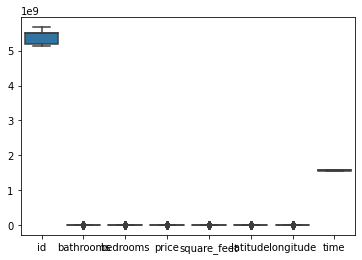

In [ ]:
sns.boxplot(data=df)

 So, we summary statistics and observe the global feature of the data, try to find out the relationship and distribution among the features, find the outliers, and try to process the data.

In [ ]:
df.describe() 

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,9.910500e+04,99105.000000,99105.000000,99105.000000,99105.000000,99105.000000,99105.000000,9.910500e+04
mean,5.358114e+09,1.444554,1.726179,1525.507694,955.996045,36.941309,-91.555552,1.559652e+09
std,1.846979e+08,0.548101,0.751158,903.660869,387.732138,4.604559,15.832541,1.105025e+07
min,5.121046e+09,0.000000,0.000000,100.000000,101.000000,19.573800,-159.369800,1.544174e+09
25%,5.197948e+09,1.000000,1.000000,1012.000000,729.000000,33.743600,-104.817100,1.550832e+09
50%,5.508672e+09,1.000000,2.000000,1350.000000,900.000000,37.213900,-84.549400,1.568745e+09
75%,5.509006e+09,2.000000,2.000000,1795.000000,1115.000000,39.955900,-77.576700,1.568767e+09
max,5.669439e+09,9.000000,9.000000,52500.000000,40000.000000,64.833200,-68.778800,1.577391e+09



The feet and max price looks much higher than the mean, which means the data is skewed. so, we try to drop these rows by using IQR method.

In [ ]:
# use IQR method to drop the outliers in 'square_feet' 
Q1 = df['square_feet'].quantile(0.25)
Q3 = df['square_feet'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['square_feet'] >= lower_bound) & (df['square_feet'] <= upper_bound)]

# use IQR method to drop the outliers in 'price'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
df.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,9.192700e+04,91927.00000,91927.000000,91927.000000,91927.000000,91927.000000,91927.000000,9.192700e+04
mean,5.355105e+09,1.39867,1.664255,1383.391669,907.774169,36.941627,-91.232282,1.559486e+09
std,1.836797e+08,0.50105,0.680488,512.817885,255.342931,4.591339,15.393582,1.098656e+07
min,5.121046e+09,0.00000,0.000000,100.000000,150.000000,19.666000,-159.369800,1.544174e+09
25%,5.197943e+09,1.00000,1.000000,995.000000,720.000000,33.700600,-101.310700,1.550831e+09
50%,5.508655e+09,1.00000,2.000000,1300.000000,882.000000,37.213900,-84.528900,1.568744e+09
75%,5.509002e+09,2.00000,2.000000,1685.000000,1091.000000,39.905000,-77.704500,1.568767e+09
max,5.669439e+09,4.00000,6.000000,2897.000000,1694.000000,64.833200,-68.778800,1.577391e+09


In terms of numerical features, the mean, median, standard deviation, minimum and maximum of each feature are shown. 
According to the table, the latitude is from 19.57 to 64.83, average is 36.95 and longtitude is from -158.37 to -68.78, average is -91.57, which refer to the data is mainly covers North America, especially the continental United States, because the latitude and longitude of the continental United States are roughly within this range. Which is also confirm this is a dataset of classified for apartments for rent in USA, accoding to the reference link https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified

In [ ]:
df.describe(include=object)

,category,title,body,amenities,currency,fee,has_photo,pets_allowed,price_display,price_type,cityname,state,source
count,91927,91927,91927,91927,91927,91927,91927,91927,91927,91927,91927,91927,91927
unique,7,53784,87244,9116,1,2,3,5,2475,3,2830,51,23
top,housing/rent/apartment,Apartment in great location,"When searching for a pet-friendly One-, Two- a...",NONE,USD,No,Yes,Not_allowed,"$1,350",Monthly,Dallas,TX,RentDigs.com
freq,91872,1001,43,14088,91927,91773,51499,55265,551,91925,2776,10937,84515


According to the table, apartments.csv has 22 features, including  7 numerical features and 14 categorical features. 

In terms of numerical features, we can analyze the relationship and distribution among bathrooms and bedrooms square_feet and price.

In terms of categorical features,category, pets_allowed and state are the perspectives can be analyzed meaningfully.



In [ ]:
df['has_photo'].value_counts()

Yes          51499
Thumbnail    32085
No            8343
Name: has_photo, dtype: int64

In [ ]:
df['price_type'].value_counts()

Monthly           91925
Weekly                1
Monthly|Weekly        1
Name: price_type, dtype: int64

we can see that the most of the data rows are 'Monthly', and the only 1 row is 'weekly', and 1 row is 'Monthly|Weekly'. So we just drop these 2 rows.


In [ ]:
df.drop(df[df['price_type'] == 'Weekly'].index, inplace=True)
df.drop(df[df['price_type'] == 'Monthly|Weekly'].index, inplace=True)
df['price_type'].value_counts()

Monthly    91925
Name: price_type, dtype: int64

In [ ]:
df['pets_allowed'].value_counts()

Not_allowed       55265
Cats,Dogs         34852
Cats               1742
Dogs                 65
Cats,Dogs,None        1
Name: pets_allowed, dtype: int64

In [ ]:
df.drop(df[df['pets_allowed'] == 'Cats,Dogs,None'].index, inplace=True)
df['pets_allowed'].value_counts()

Not_allowed    55265
Cats,Dogs      34852
Cats            1742
Dogs              65
Name: pets_allowed, dtype: int64

We can simplify this feature by using the Value 'Yes' and 'No'.


In [ ]:
df['pets_allowed'] = df['pets_allowed'].replace({'Not_allowed': 'No', 'Cats,Dogs': 'Yes','Cats':'Yes', 'Dogs':'Yes'})
df.pets_allowed.value_counts()

No     55265
Yes    36659
Name: pets_allowed, dtype: int64

In [ ]:
df.shape

(91924, 21)

# Data visualization





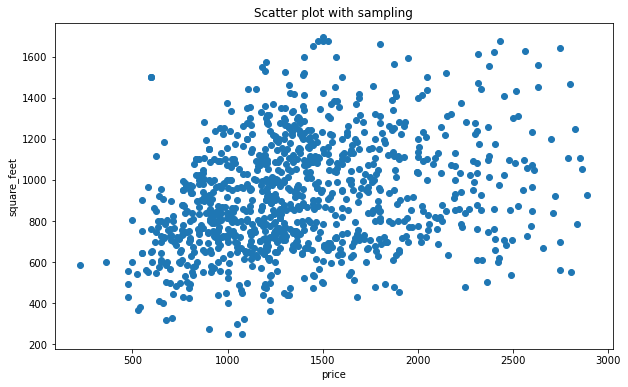

In [ ]:
# Plot the relationship between price and square_feet
sample_df = df.sample(n=1000, random_state=9)
plt.figure(figsize=(10, 6))
plt.scatter(sample_df['price'], sample_df['square_feet'])
plt.xlabel('price')
plt.ylabel('square_feet')
plt.title('Scatter plot with sampling')
plt.show()

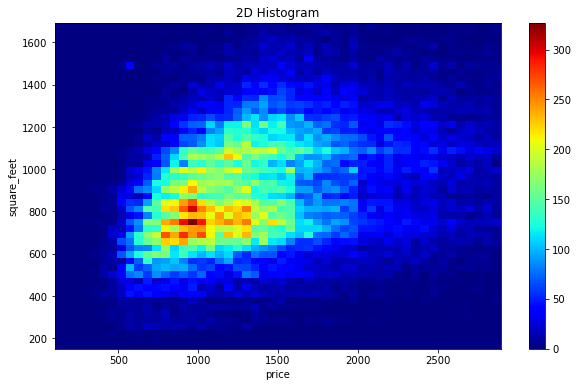

In [ ]:
# Plot the relationship between price and square_feet
plt.figure(figsize=(10, 6))
plt.hist2d(df['price'], df['square_feet'], bins=(50, 50), cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel('price')
plt.ylabel('square_feet')
plt.title('2D Histogram')
plt.show()

 There is a general positive correlation between price and square_feet. As the price increases, square_feet also tends to increase, although this trend appears to taper off at higher values of both variables.

The highest density of data points, shown in red, is concentrated around price values between approximately 600 and 1200 and square_feet values between approximately 600 and 1000. This suggests that properties within this range are the most common in the dataset.

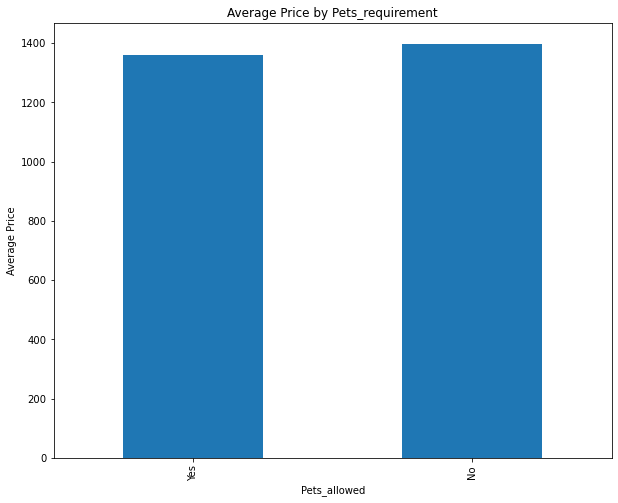

In [ ]:
plt.figure(figsize=(10, 8))

# plot the relationship between price and pet_allowed
state_price = df.groupby('pets_allowed')['price'].mean()
state_price_sorted = state_price.sort_values()

# plot the bar chart
state_price_sorted.plot(kind='bar')

plt.xlabel('Pets_allowed')
plt.ylabel('Average Price')
plt.title('Average Price by Pets_requirement')

plt.show()

In [ ]:
df['pets_allowed'].value_counts()

No     55265
Yes    36659
Name: pets_allowed, dtype: int64

The average price is similar and we can not see a strong relationship between price and pets_allowed. while Pets_allowed = 'No' has the slight higher average price.

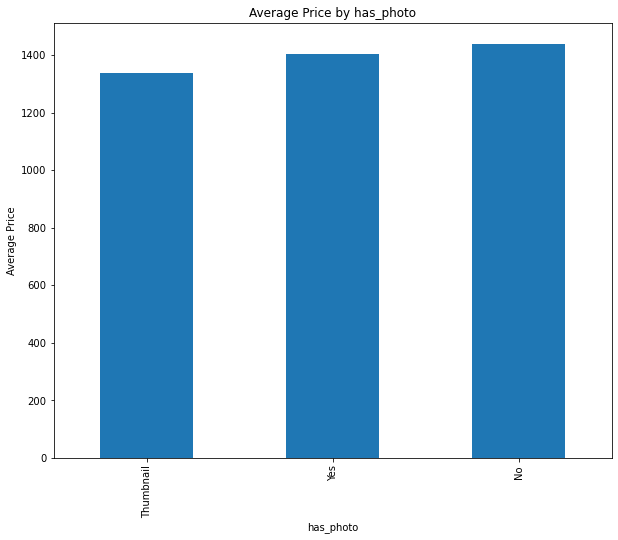

In [ ]:
# plot the relationship between price and has_photo
plt.figure(figsize=(10, 8))


state_price = df.groupby('has_photo')['price'].mean()
state_price_sorted = state_price.sort_values()

# plot the bar chart
state_price_sorted.plot(kind='bar')

plt.xlabel('has_photo')
plt.ylabel('Average Price')
plt.title('Average Price by has_photo')

plt.show()

In [ ]:
df['has_photo'].value_counts()

Yes          51499
Thumbnail    32082
No            8343
Name: has_photo, dtype: int64

The average price is similar and we can not see a strong relationship between price and has_photo . while has_photo = 'No' has the slight higher average price.

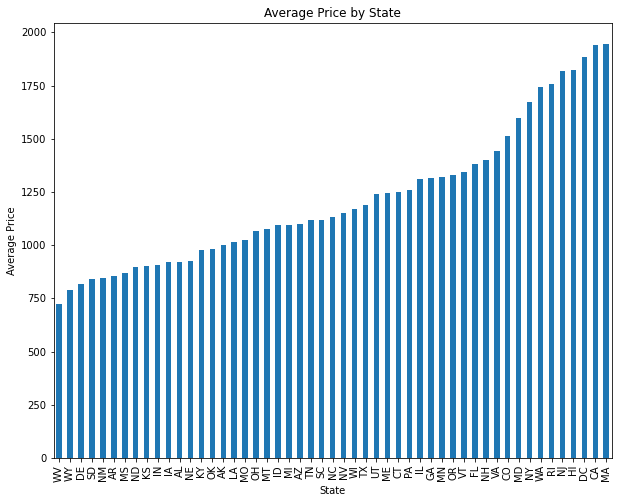

In [ ]:
plt.figure(figsize=(10, 8))

# plot the relationship between price and state
state_price = df.groupby('state')['price'].mean()
state_price_sorted = state_price.sort_values()

# plot the bar chart
state_price_sorted.plot(kind='bar')

plt.xlabel('State')
plt.ylabel('Average Price')
plt.title('Average Price by State')

plt.show()


According to the bar chart see there is a trend between price and states. State with the highest average price are MA and CA , both of which reach about 1780

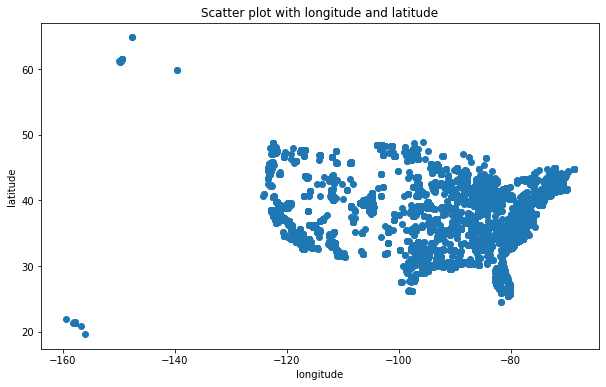

In [ ]:
# Plot scatter plot 
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'])
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.title('Scatter plot with longitude and latitude')
plt.show()

According to the latitude and longitude shows a brief of USA map. Most of our data are collect from the east and of the USA, which is reasonable beacuse of its population distribution.








Considering it is not effective to visualize each 2 of the relationship in numerical , I decide to compute correlation matrix between price and other numerical features.


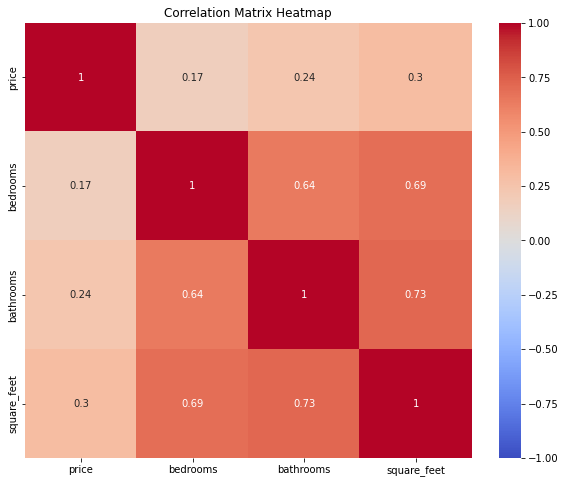

In [ ]:
# calcualte the correlation matrix among  
considered_df = df[['price', 'bedrooms', 'bathrooms', 'square_feet']]
considered_df
correlation_matrix = considered_df.corr()
# plot hit map to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

There are a positive Correlation between Price and numbers of Bedrooms/Bathrooms and square_feet.


The price increase due to more bedrooms/bathrooms might be partly because they are often found in larger houses (more square_feet).

Based on the EDA, we can conclude the factors for prediction are:
1. Bedrooms, bathrooms, square_feet are factors to predict target.
2. Pets_allowed and has_photo are not a necessary factor to predict target.
3. state has a strong correlation with price.

# Build Model and Evaluate


In order to build a model, we can simplfy our dataset. map our price in to categorial values. According to the distribution of prices. I decide to use 6 categories: 0-500, 500-1000, 1000-1500, 1500-2000, 2000-2500, 2500-3000

In [ ]:
df.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,9.192400e+04,91924.000000,91924.000000,91924.000000,91924.000000,91924.000000,91924.000000,9.192400e+04
mean,5.355100e+09,1.398693,1.664288,1383.406738,907.790523,36.941658,-91.232517,1.559486e+09
std,1.836768e+08,0.501033,0.680470,512.810711,255.327806,4.591241,15.393731,1.098641e+07
min,5.121046e+09,0.000000,0.000000,100.000000,150.000000,19.666000,-159.369800,1.544174e+09
25%,5.197943e+09,1.000000,1.000000,995.000000,720.000000,33.700600,-101.310700,1.550831e+09
50%,5.508654e+09,1.000000,2.000000,1300.000000,882.000000,37.215300,-84.528900,1.568744e+09
75%,5.509002e+09,2.000000,2.000000,1685.000000,1091.000000,39.905000,-77.704500,1.568767e+09
max,5.669439e+09,4.000000,6.000000,2897.000000,1694.000000,64.833200,-68.778800,1.577391e+09


In [ ]:
df['price_level'] = pd.cut(df['price'], bins=[0, 500, 1000, 1500, 2000, 2500, 3000], labels=['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000'])
# check the none
df['price_level'].value_counts()

1000-1500    35598
500-1000     23575
1500-2000    20436
2000-2500     8547
2500-3000     3208
0-500          560
Name: price_level, dtype: int64

In [ ]:
# Extract the data we need
ndf = df[['state', 'bedrooms', 'bathrooms', 'square_feet','price_level','price']]
# Split the data into training and testing sets
ndf

,state,bedrooms,bathrooms,square_feet,price_level,price
0,CA,1.0,1.0,542,2000-2500,2195.0
1,VA,3.0,1.5,1500,1000-1500,1250.0
2,NC,3.0,2.0,1650,1000-1500,1395.0
3,CA,2.0,1.0,820,1500-2000,1600.0
4,NM,1.0,1.0,624,500-1000,975.0
...,...,...,...,...,...,...
99487,TX,1.0,1.0,605,500-1000,780.0
99488,FL,2.0,2.0,921,500-1000,813.0
99489,CA,1.0,1.0,650,1000-1500,1325.0
99490,NC,1.0,1.0,701,500-1000,931.0


Random Forest

d:\anaconda3envs\env_jupyter\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Confusion Matrix:
[[  18   82   10    2    0    0]
 [  34 3330 1110  195   42    4]
 [   6 1048 4853  958  197   58]
 [   5  223 1122 2271  353  113]
 [   0   55  273  501  737  143]
 [   0   13   96  152  175  206]]
Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.16      0.21       112
           1       0.70      0.71      0.70      4715
           2       0.65      0.68      0.67      7120
           3       0.56      0.56      0.56      4087
           4       0.49      0.43      0.46      1709
           5       0.39      0.32      0.35       642

    accuracy                           0.62     18385
   macro avg       0.51      0.48      0.49     18385
weighted avg       0.62      0.62      0.62     18385



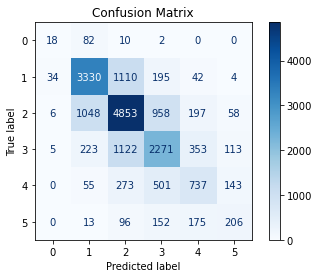

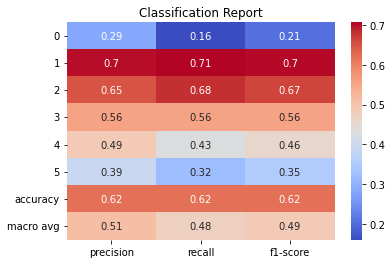

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Read data
data = ndf

# Define features and target variable
features = data.drop('price_level', axis=1)


# Convert price_level to categorical labels
price_bins = [0, 500, 1000, 1500, 2000, 2500, 3000]
price_labels = [0, 1, 2, 3, 4, 5]
data['price_level_category'] = pd.cut(data['price'], bins=price_bins, labels=price_labels, include_lowest=True)
data['price_level_category'].value_counts()

# Update target variable
target = data['price_level_category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=9, stratify=target)

# Preprocess the data: One-hot encode categorical features, standardize numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['bedrooms', 'bathrooms', 'square_feet']),
        ('cat', OneHotEncoder(), ['state'])])

# Preprocess training and testing data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Train RandomForest classifier
model = RandomForestClassifier(n_estimators=100, random_state=9)
model.fit(X_train_preprocessed, y_train)

# Predict on the test set
y_pred = model.predict(X_test_preprocessed)

# Evaluate the model

conf_matrix = confusion_matrix(y_test, y_pred, labels=price_labels)
report = classification_report(y_test, y_pred, labels=price_labels, output_dict=True)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred, labels=price_labels))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=price_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Plot classification report
report_df = pd.DataFrame(report).transpose()
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='coolwarm')
plt.title('Classification Report')
plt.show()



The classification report of the random forest model reveals a mixed performance across the defined intervals. While the model exhibits strong precision and recall for intervals such as 500-1000 and 1000-1500, indicating its effectiveness in accurately classifying data points within these ranges, its performance diminishes for intervals like 0-500 and 2000-2500, where precision and recall are notably lower. Additionally, for the interval 2500-3000, the model struggles to correctly classify instances, as evidenced by lower precision and recall values. Overall, the model demonstrates moderate accuracy, with an overall accuracy of 0.62.

Logistic Regression

Confusion Matrix:
[[   0  107    5    0    0    0]
 [   0 2908 1679  119    9    0]
 [   0 1239 4730 1053   98    0]
 [   0  198 1944 1680  263    2]
 [   0   29  432  875  366    7]
 [   0    8   99  311  222    2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       112
           1       0.65      0.62      0.63      4715
           2       0.53      0.66      0.59      7120
           3       0.42      0.41      0.41      4087
           4       0.38      0.21      0.27      1709
           5       0.18      0.00      0.01       642

    accuracy                           0.53     18385
   macro avg       0.36      0.32      0.32     18385
weighted avg       0.51      0.53      0.51     18385



d:\anaconda3envs\env_jupyter\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3envs\env_jupyter\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3envs\env_jupyter\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3envs\env_jupyter\lib\site-packa

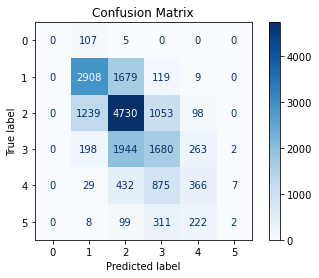

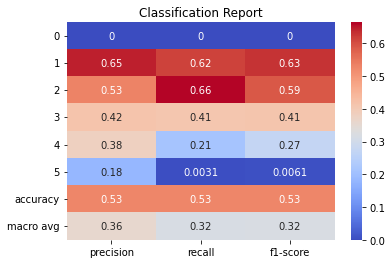

In [ ]:

from sklearn.linear_model import LogisticRegression

# Train Logistic Regression classifier
model = LogisticRegression(max_iter=1000, random_state=9)
model.fit(X_train_preprocessed, y_train)

# Predict on the test set
y_pred = model.predict(X_test_preprocessed)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred, labels=price_labels)
report = classification_report(y_test, y_pred, labels=price_labels, output_dict=True)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred, labels=price_labels))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=price_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Plot classification report
report_df = pd.DataFrame(report).transpose()
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='coolwarm')
plt.title('Classification Report')
plt.show()




Comparing with the previous random forest model, logistic regression generally exhibits lower performance, with lower precision, recall, and F1-scores across most intervals. The logistic regression model also yields a lower overall accuracy of 0.53 compared to the random forest's accuracy of 0.62. Additionally, logistic regression shows a tendency for lower recall values, particularly in intervals with higher ranges, suggesting a limitation in correctly identifying instances within those intervals compared to random forest. Overall, logistic regression performs less effectively in classifying instances across the defined intervals compared to the random forest model.

MLP

d:\anaconda3envs\env_jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


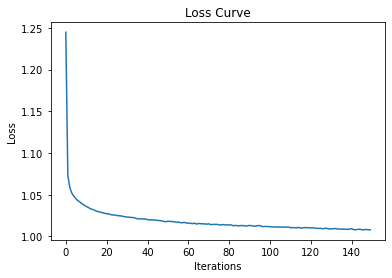

Confusion Matrix:
[[   8   96    8    0    0    0]
 [  11 3171 1433   65   33    2]
 [   1 1234 4977  622  278    8]
 [   1  205 1934 1360  567   20]
 [   0   51  418  463  751   26]
 [   0   18  115  129  356   24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.07      0.12       112
           1       0.66      0.67      0.67      4715
           2       0.56      0.70      0.62      7120
           3       0.52      0.33      0.40      4087
           4       0.38      0.44      0.41      1709
           5       0.30      0.04      0.07       642

    accuracy                           0.56     18385
   macro avg       0.47      0.38      0.38     18385
weighted avg       0.55      0.56      0.54     18385



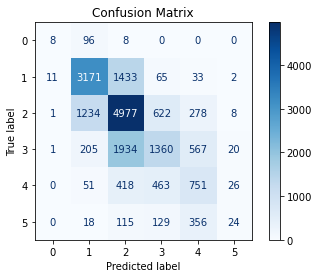

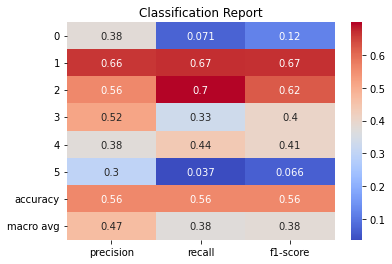

In [ ]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Train MLP classifier
model = MLPClassifier(hidden_layer_sizes=(50,10,20), max_iter=150, random_state=9)
model.fit(X_train_preprocessed, y_train)

# Visualize loss curve
plt.plot(model.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

# Predict on the test set
y_pred = model.predict(X_test_preprocessed)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred, labels=price_labels)
report = classification_report(y_test, y_pred, labels=price_labels, output_dict=True)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred, labels=price_labels))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=price_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Plot classification report
report_df = pd.DataFrame(report).transpose()
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='coolwarm')
plt.title('Classification Report')
plt.show()




Comparing with the previous models, the MLP model with layers (50, 10, 20) exhibits a somewhat similar performance to logistic regression, with moderate precision, recall, and F1-scores across most intervals. However, it outperforms logistic regression in some aspects, such as in intervals 0-500 and 1000-1500. The MLP model also shows improvements in overall accuracy compared to logistic regression, achieving an accuracy of 0.56. Nonetheless, there are still intervals where precision and recall are relatively low, indicating challenges in accurately classifying instances within those ranges. Overall, the MLP model with layers (50, 10, 20) presents a mixed performance across the defined intervals, with room for further refinement.